<h2 style="color:blue">Import Libraries</h2>


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

<h2 style="color:blue">load dataset and data pre processing(EDA)</h2>


In [3]:
df = pd.read_csv('seattle-weather.csv')

In [4]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [28]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,0,2012,1,1
1,10.9,10.6,2.8,4.5,2,2012,1,2
2,0.8,11.7,7.2,2.3,2,2012,1,3
3,20.3,12.2,5.6,4.7,2,2012,1,4
4,1.3,8.9,2.8,6.1,2,2012,1,5


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   int64  
 5   year           1461 non-null   int32  
 6   month          1461 non-null   int32  
 7   day            1461 non-null   int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 74.3 KB


In [36]:
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
year             0
month            0
day              0
dtype: int64

<h2 style="color:blue">Convert 'date' to datetime and extract features</h2>


In [9]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


<h2 style="color:blue">drop original date column</h2>

In [10]:
df = df.drop('date', axis=1)

<h2 style="color:blue">label encoding</h2>

In [11]:
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

<h2 style="color:blue">spliting data</h2>

In [38]:
X = df[['precipitation' , 'temp_max' , 'temp_min' ,'wind','year','month','day']]

y = df['weather']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<h2 style="color:blue">Decision Tree</h2>


In [15]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<h2 style="color:blue">predict and evulate</h2>

In [24]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


<h2 style="color:blue">Comparision</h2>

In [20]:
result_df = X_test.copy()
result_df['Actual'] = y_test.values
result_df['Predicted'] = y_pred

In [21]:
result_df['Actual'] = le.inverse_transform(result_df['Actual'])
result_df['Predicted'] = le.inverse_transform(result_df['Predicted'])

<h2 style="color:blue">Accuracy</h2>

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7650273224043715


In [26]:
print("\n Prediction Results:")
print(result_df.head())


 Prediction Results:
      precipitation  temp_max  temp_min  wind  year  month  day Actual  \
892             0.0      23.9      11.1   2.7  2014      6   11    sun   
1105            5.8       7.8       6.1   0.5  2015      1   10   rain   
413             0.0       9.4       4.4   3.4  2013      2   17   rain   
522             0.0      26.7      12.2   2.5  2013      6    6    sun   
1036            1.8      13.3       7.2   2.9  2014     11    2   rain   

     Predicted  
892        sun  
1105      rain  
413    drizzle  
522        sun  
1036      rain  


In [18]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: C:\Users\dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
     ------------- ---------------------- 112.6/294.9 kB 504.4 kB/s eta 0:00:01
     ------------- ---------------------- 112.6/294.9 kB 504.4 kB/s eta 0:00:01
     ------------- ---------------------- 112.6/294.9 kB 504.4 kB/s eta 0:00:01
     ----------------------- ------------ 194.6/294.9 kB 512.0 kB/s eta 0:00:01
     ---------------------------- ------- 235.5/294.9 kB 576.2 kB/s eta 0:00:01
     ------------------------------- ---- 256.0/294.9 kB 524.0 kB/s eta 0:00:01
     --------------------------------- -- 276.5/294.9 kB 567.7 kB/s eta 0:00:01
     ---------------------------------- - 286.7/294.9 kB 505.4 kB/s eta

<h2 style="color:blue">Histogram graph</h2>

C:\Users\dell\AppData\Local\Temp\ipykernel_9608\2387913896.py:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


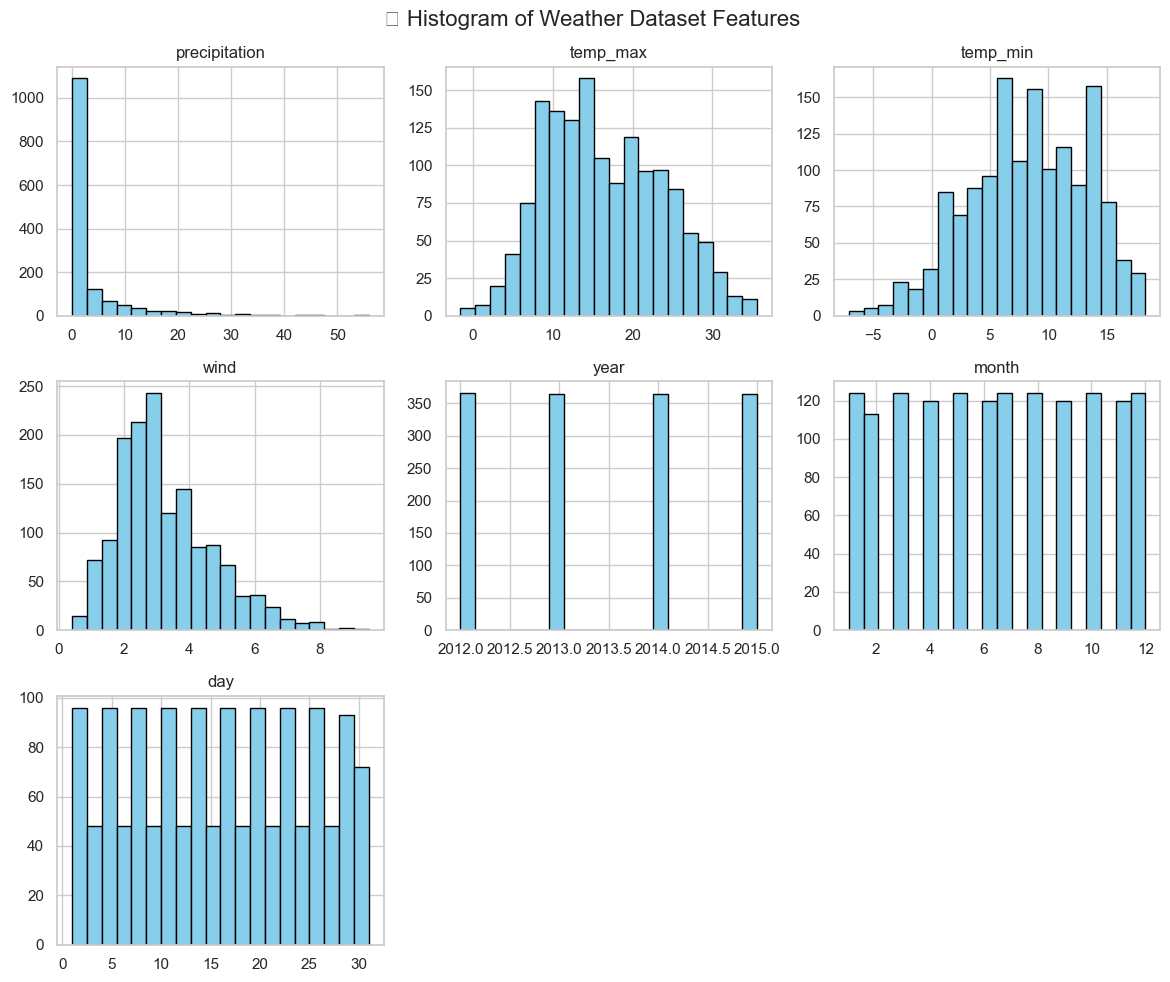

In [27]:
sns.set(style="whitegrid")
df.drop('weather', axis=1).hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("📊 Histogram of Weather Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()